# Demo of STARCOP pretrained models on AVIRIS data


In [1]:
!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 23.5 MB/s eta 0:00:00


In [2]:
# Clone the repository:
!git clone https://github.com/spaceml-org/STARCOP.git

Cloning into 'STARCOP'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 154 (delta 48), reused 119 (delta 25), pack-reused 0
Receiving objects: 100% (154/154), 8.56 MiB | 28.09 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [3]:
# Data:
# STARCOP_mini.zip with 261 MB
!gdown https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl -O STARCOP_mini.zip

# Models:
!gdown https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX -O multistarcop_varon.zip
!gdown https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql -O hyperstarcop_magic_rgb.zip

Downloading...
From (original): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl
From (redirected): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl&confirm=t&uuid=d802ff4c-7622-4a9d-b0b9-0b892085964c
To: /content/STARCOP_mini.zip
100% 274M/274M [00:02<00:00, 128MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX
From (redirected): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX&confirm=t&uuid=f5f27366-cd74-43b8-a002-730860f1bb20
To: /content/multistarcop_varon.zip
100% 73.5M/73.5M [00:00<00:00, 79.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql
From (redirected): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql&confirm=t&uuid=70327538-effe-491e-a34a-4eca65902ef1
To: /content/hyperstarcop_magic_rgb.zip
100% 73.3M/73.3M [00:01<00:00, 36.8MB/s]


In [4]:
!unzip -q STARCOP_mini.zip
!unzip -q multistarcop_varon.zip
!unzip -q hyperstarcop_magic_rgb.zip
# clean-up
!rm *.zip

In [5]:
!ls

hyperstarcop_magic_rgb	multistarcop_varon  sample_data  STARCOP  STARCOP_mini


In [6]:
%cd /content/STARCOP

/content/STARCOP


In [7]:
!pip --quiet install -r requirements.txt
# ignore the warnings about the library versions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.2/529.2 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [8]:
# additional libraries and exact versions:
!pip install git+https://github.com/spaceml-org/georeader.git
!pip install torchtext==0.14.1

  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-s9bifdsy
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-s9bifdsy
  Resolved https://github.com/spaceml-org/georeader.git to commit 813d92ebbe79aa79b99c9a4bf05b7894cbc30bf3
  Preparing metadata (setup.py) ... done
  Created wheel for georeader-spaceml: filename=georeader_spaceml-1.1.1-py3-none-any.whl size=149908 sha256=77988f09c10ce6789d49c843b23b61a3d058cf021f95fe852db1e400d6967990
  Stored in directory: /tmp/pip-ephem-wheel-cache-p1k_rzkh/wheels/d2/8e/86/ec6888325df45badf27fbc6acbb49d9d0432d04ddf3b8020b4
Successfully built georeader-spaceml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.17.1
    Uninstalling torchtext-0.17.1:
      Successfully uninstalled torchtext-0.17.1


In [10]:
%cd /content/STARCOP

/content/STARCOP


In [11]:
import omegaconf
import pylab as plt
import torch
import omegaconf
import fsspec
import os
import json
import pandas as pd
import numpy as np
from starcop.torch_utils import to_device
import starcop.plot as starcoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable

from starcop.data.datamodule import Permian2019DataModule
from starcop.models.model_module import ModelModule
from starcop.validation import run_validation

device = torch.device("cuda:0")
fs = fsspec.filesystem("gs")
config_general = omegaconf.OmegaConf.load("scripts/configs/config.yaml")
root_folder = "/content/STARCOP_mini"

## laoding the HyperSTARCOP pretrained model from the hugging face

In [12]:
hsi_model_path = "/content/hyperstarcop_magic_rgb/final_checkpoint_model.ckpt"
hsi_config_path = "/content/hyperstarcop_magic_rgb/config.yaml"

In [13]:
def load_model_with_datamodule(model_path, config_path):
    config_model = omegaconf.OmegaConf.load(config_path)
    config = omegaconf.OmegaConf.merge(config_general, config_model)

    import ast
    dataset_dict = ast.literal_eval(config_model['_content']['value']['dataset'])
    dataset_dict['root_folder'] = root_folder
    dataset_dict['train_csv'] = '/content/STARCOP_mini/train_mini10.csv'
    config.dataset = dataset_dict
    config.products_plot = config_model['_content']['value']['products_plot']

    data_module = Permian2019DataModule(config)
    data_module.test_csv = '/content/STARCOP_mini/test_mini10.csv'
    data_module.settings['dataset'] = dataset_dict
    data_module.prepare_data()

    model = ModelModule.load_from_checkpoint(model_path, settings=config)
    model.to(device)
    model.eval() # !

    print("Loaded model with",model.num_channels,"input channels, data module with", len(data_module.input_products), "inputs:", data_module.input_products, ", for plotting we use these products:", config.products_plot)

    return model, data_module, config

hsi_model, hsi_dm, hsi_config = load_model_with_datamodule(hsi_model_path, hsi_config_path)
print("successfully loaded HyperSTARCOP model!")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Computing label statistics:   0%|          | 0/441 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Computing label statistics: 100%|██████████| 441/441 [00:04<00:00, 104.94it/s]


Loaded model with 4 input channels, data module with 4 inputs: ['mag1c', 'TOA_AVIRIS_640nm', 'TOA_AVIRIS_550nm', 'TOA_AVIRIS_460nm'] , for plotting we use these products: ['rgb_aviris', 'mag1c', 'label', 'pred', 'differences']
successfully loaded HyperSTARCOP model!


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


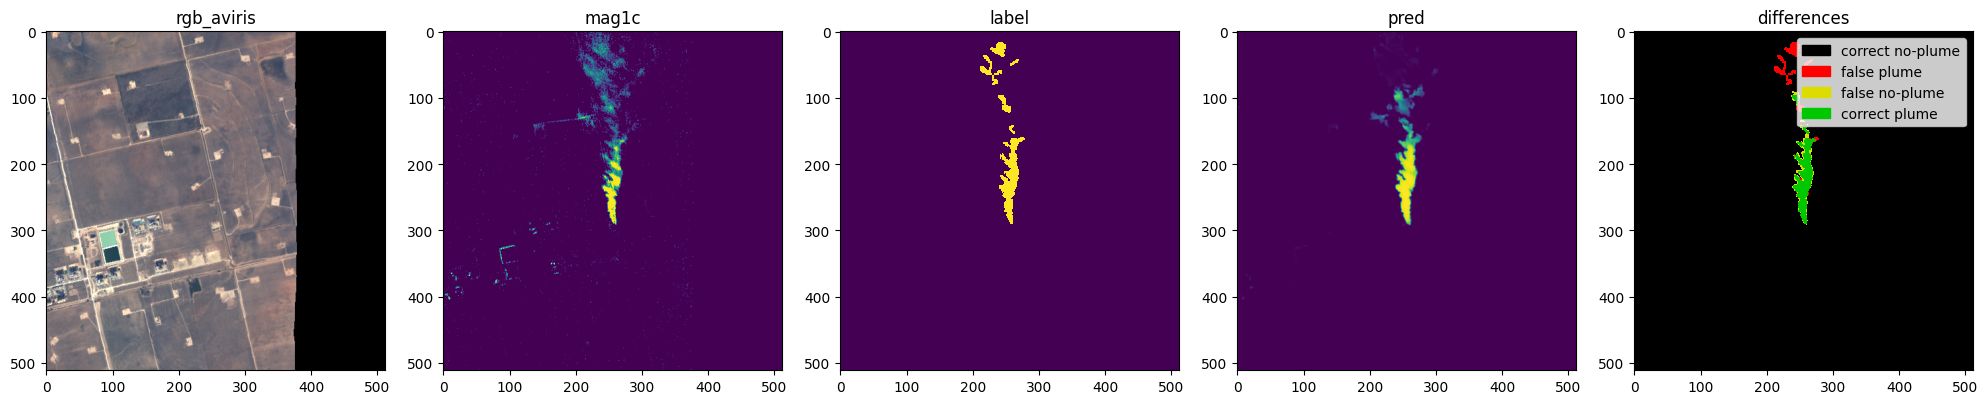

In [14]:
dataloader = hsi_dm.test_dataloader(batch_size=1)
how_many = 1
for i, plume_data in enumerate(dataloader):
    plume_data = hsi_model.batch_with_preds(to_device(plume_data, hsi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=hsi_config.dataset.input_products,
                                products_plot=hsi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    how_many -=1
    if how_many <= 0: break